In [1]:
import cv2
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
# img = cv2.imread('0.jpg', cv2.IMREAD_GRAYSCALE).astype(np.float32) #读取为灰度图片
img = cv2.imread('1.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)
# img = cv2.imread('2.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)
# img = cv2.imread('3.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)
# img = cv2.imread('4.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)
# img = cv2.imread('5.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)
# img = cv2.imread('6.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
print(img[:10, :10])
plt.imshow(img, 'gray')
plt.show()
# cv2.imshow('test', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
img_dct = cv2.dct(img)
# img_dct_f = np.log(np.abs(img_dct))
img_dct_f = np.abs(img_dct)
print(img_dct.shape)
print(img_dct_f[:10, :10])
plt.imshow(img_dct_f)
plt.show()

In [ ]:
# lf = (img_dct_f >= 0) * (img_dct_f < 10)
lf = img_dct_f > 20
mf = (img_dct_f >= 10) * (img_dct_f < 20)
hf = img_dct_f < 10

plt.subplot(131)
plt.title('low freq')
plt.imshow(lf)

plt.subplot(132)
plt.title('mid freq')
plt.imshow(mf)

plt.subplot(133)
plt.title('high freq')
plt.imshow(hf)

plt.show()

In [ ]:
img_dct_low = cv2.idct(img_dct * lf)
img_dct_mid = cv2.idct(img_dct * mf)
img_dct_high = cv2.idct(img_dct * hf)

In [ ]:
# plt.figure(figsize=(50,50))

plt.subplot(221)
plt.title('original')
plt.imshow(img, 'gray')

plt.subplot(222)
plt.title('low')
plt.imshow(img_dct_low, 'gray')

plt.subplot(223)
plt.title('mid')
plt.imshow(img_dct_mid, 'gray')

plt.subplot(224)
plt.title('high')
plt.imshow(img_dct_high, 'gray')

plt.show()

In [ ]:
print(np.min(img_dct_low), np.max(img_dct_low))
print(np.min(img_dct_mid), np.max(img_dct_mid))
print(np.min(img_dct_high), np.max(img_dct_high))

In [ ]:
a = cv2.idct(img_dct)
plt.imshow(a, 'gray')
plt.show()

In [ ]:
print(img_dct_low.shape)
print(img_dct_low[:,:,None].shape)

In [ ]:
def filter_bank_preprocess(img_path: str, k: int=10):
    img = cv2.imread(img_path, flags=cv2.IMREAD_GRAYSCALE).astype(np.float32)
    img_dct = cv2.dct(img)
    img_dct_f = np.abs(img_dct)

    low_freq = img_dct_f > 2*k
    mid_freq = (img_dct_f >= k) * (img_dct_f < 2*k)
    high_freq = img_dct_f < k

    img_dct_low = cv2.idct(img_dct * low_freq)[:, :, None]
    img_dct_mid = cv2.idct(img_dct * mid_freq)[:, :, None]
    img_dct_high = cv2.idct(img_dct * high_freq)[:, :, None]
    return np.concatenate((img_dct_low, img_dct_mid, img_dct_high), axis=2)

In [ ]:
res = filter_bank_preprocess('1.png')

In [ ]:
print(res.shape)

In [ ]:
t = res[:,:,0]
plt.imshow(t, 'gray')
plt.show()

In [ ]:
img = cv2.imread('0.jpg').astype(np.float32) #读取为灰度图片
print(img.shape)

In [ ]:
img = cv2.imread('0.jpg')
print(isinstance(torch.from_numpy(img), torch.ByteTensor))

In [ ]:
from utils.transforms import DCT
from data.dataset import RecaptureDataset
from torchvision.transforms import transforms as T
from config import opt

img = Image.open('0.jpg')
transform = T.Compose([
    T.Resize(opt.img_size),
    DCT()
])

img = transform(img)
print(type(img), img.shape)
print(torch.max(img))

In [ ]:
from torchvision.models import mobilenet_v3_small

model = mobilenet_v3_small(weights=False)


In [ ]:
print(model)

In [ ]:
print(model.features[-1])

In [12]:
from torchvision.models import resnet50

model = resnet50(weights=False)
print(model)

/Users/Tristan/anaconda3/envs/torch2/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [16]:
x = torch.randn(1,3,224,224)
x = model.conv1(x)
x = model.bn1(x)
x = model.relu(x)
x = model.maxpool(x)
l1 = model.layer1(x)
print(l1.shape)
x = model.layer2(l1)
l3 = model.layer3(x)
print(l3.shape)
l4 = model.layer4(l3)
print(l4.shape)

torch.Size([1, 256, 56, 56])
torch.Size([1, 1024, 14, 14])
torch.Size([1, 2048, 7, 7])


In [ ]:
from models.models import ResNet50Branch
model = ResNet50Branch()
print(model(torch.randn(1,3,224,224))[2].shape)

In [7]:
a = torch.randn(2,3,4,5)
print(a.flatten(1,2).shape)
print(a.reshape(2,3,4,5).shape)

torch.Size([2, 12, 5])
torch.Size([2, 3, 4, 5])


In [2]:
a = torch.randn(1,2,3)
b = torch.randn(1,2,3)

In [3]:
c = a @ b.transpose(-2, -1)
print(c.shape)

torch.Size([1, 2, 2])


In [14]:
a = torch.randn(1,3,224,224)
a = nn.functional.interpolate(input=a, size=(7,7), mode='bilinear')
print(a.shape)

torch.Size([1, 3, 7, 7])


In [17]:
from torchvision.models import densenet121
model = densenet121(weights=None)
print(model)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [7]:
from models.models import TBNet
model = TBNet()
a = torch.randn(1,3,224,224)
a = model(a)
print(a)

tensor([[-0.0306,  0.2107]], grad_fn=<AddmmBackward0>)


In [13]:
model(torch.randn(1,3,224,224))

tensor([[ 3.5939e-01,  1.9074e-01, -2.6771e-01,  3.0885e-02,  5.9954e-01,
          7.0140e-01, -2.4401e-01, -1.7202e-01,  4.4703e-02,  1.0456e-01,
         -5.9610e-01, -3.6353e-02, -8.4576e-01,  1.7502e-01, -1.4140e-01,
          5.4820e-01, -2.8961e-01, -2.9041e-01,  9.7538e-01, -7.6583e-01,
         -3.9553e-01,  2.3112e-01, -1.5042e+00,  9.5894e-03,  1.0959e-01,
          7.0200e-01, -1.5800e-02, -5.7178e-01,  5.0056e-01,  6.3486e-01,
         -6.9760e-01, -3.5327e-01,  2.9515e-02,  7.6578e-01,  3.5963e-01,
         -8.7728e-02,  5.6729e-01,  3.0701e-01, -1.1256e+00,  4.1008e-01,
          4.6911e-01, -1.4084e+00, -1.9215e-01,  7.8370e-01,  1.8526e-01,
          1.1930e-02, -1.2467e-01, -4.1979e-01,  1.7588e-01,  7.7406e-01,
         -1.0249e+00,  3.4002e-01,  6.1109e-01, -6.8165e-02,  1.4725e-01,
         -1.1190e+00,  9.5786e-01,  1.6915e-02,  2.5695e-01,  4.1932e-01,
         -2.8678e-01, -5.6024e-01,  2.9855e-01, -8.4647e-01, -8.7467e-02,
         -8.7404e-01, -1.5808e-01, -1.

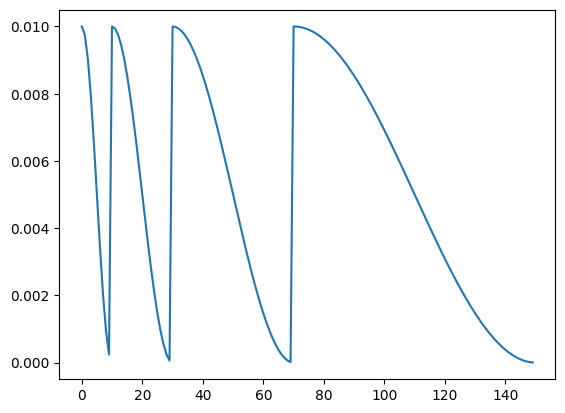

In [25]:
import numpy as np
import torch
from torchvision import models
import matplotlib.pyplot as plt

net = models.resnet18(pretrained=False)


max_epoch=150 # 一共50 epoch
iters=200    # 每个epoch 有 200 个 bach

optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
scheduler =  torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer = optimizer,T_0 = 10, T_mult=2) #  * iters


lr = []
for epoch in range(max_epoch):
    for batch in range(iters):
        optimizer.step()


    lr.append(scheduler.get_lr()[0])
    scheduler.step() # 注意 每个epoch 结束， 更新learning rate

plt.plot(np.arange(max_epoch), lr)

In [52]:
from typing import List
from bisect import bisect_right
class WarmupMultiStepLR(torch.optim.lr_scheduler._LRScheduler):
    def __init__(
        self,
        optimizer: torch.optim.Optimizer,
        milestones: List[int],
        gamma: float = 0.1,
        warmup_factor: float = 0.001,
        warmup_iters: int = 1000,
        warmup_method: str = "linear",
        last_epoch: int = -1,
    ):
        if not list(milestones) == sorted(milestones):
            raise ValueError(
                "Milestones should be a list of" " increasing integers. Got {}", milestones
            )
        self.milestones = milestones
        self.gamma = gamma
        self.warmup_factor = warmup_factor
        self.warmup_iters = warmup_iters
        self.warmup_method = warmup_method
        super().__init__(optimizer, last_epoch)

    def get_lr(self) -> List[float]:
        warmup_factor = _get_warmup_factor_at_iter(
            self.warmup_method, self.last_epoch, self.warmup_iters, self.warmup_factor
        )
        return [
            base_lr * warmup_factor * self.gamma ** bisect_right(self.milestones, self.last_epoch)
            for base_lr in self.base_lrs
##################################################
## self.base_lrs 【0.001，.... 0.001】 len = 84
#################################################
        ]

    def _compute_values(self) -> List[float]:
        # The new interface
        return self.get_lr()



def _get_warmup_factor_at_iter(method: str, iter: int, warmup_iters: int, warmup_factor: float) -> float:
    """
    Return the learning rate warmup factor at a specific iteration.
    See https://arxiv.org/abs/1706.02677 for more details.

    Args:
        method (str): warmup method; either "constant" or "linear".
        iter (int): iteration at which to calculate the warmup factor.
        warmup_iters (int): the number of warmup iterations.
        warmup_factor (float): the base warmup factor (the meaning changes according
            to the method used).

    Returns:
        float: the effective warmup factor at the given iteration.
    """
    if iter >= warmup_iters:
        return 1.0

    if method == "constant":
        return warmup_factor
    elif method == "linear":
        alpha = iter / warmup_iters
        return warmup_factor * (1 - alpha) + alpha
    else:
        raise ValueError("Unknown warmup method: {}".format(method))

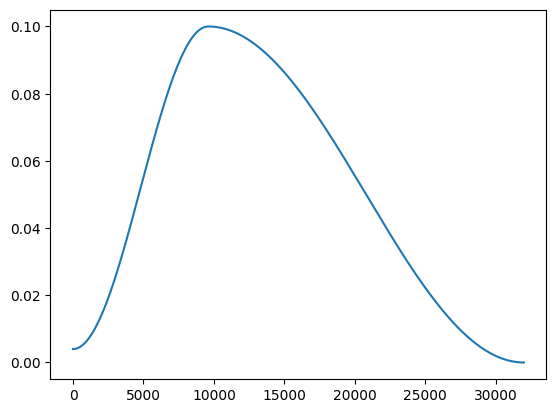

In [1]:
import math
import torch
from torchvision.models import resnet18
from utils.schedulers import CosineAnnealingWarmupLR
import utils
import numpy as np
import torch.optim as optim
from config import cfg
import matplotlib.pyplot as plt

model = resnet18(weights=None)	# 加载模型
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)	# base_lr = 0.1

# 设置warm up的轮次为100次
warm_up_iter = 10
T_max = 150	# 周期
iters = 200
lr_max = 0.1	# 最大值
lr_min = 1e-5	# 最小值

# 为param_groups[0] (即model.layer2) 设置学习率调整规则 - Warm up + Cosine Anneal, lr_lambda计算的是 lr 的乘法因子
# lambda0 = lambda cur_iter: (cur_iter / warm_up_iter) if  cur_iter < warm_up_iter else \
#     ((lr_min +
#       0.5*(lr_max-lr_min)
#       *(1.0+math.cos( (cur_iter-warm_up_iter)
#                       /(T_max)*math.pi)))/0.1)

# LambdaLR
# scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=[lambda0])
# scheduler = getattr(utils.schedulers, 'CosineAnnealingWarmupLR')(optimizer, **opt.CosineAnnealingWarmupLR)
scheduler = getattr(optim.lr_scheduler, 'OneCycleLR')(optimizer, **cfg.OneCycleLR)
# print(utils.schedulers.__dict__)

lr = []
for epoch in range(160):
    for batch in range(iters):
        optimizer.step()
        lr.append(scheduler.get_lr()[0])
        lr.append(list(optimizer.param_groups)[0]['lr'])
        scheduler.step()


# for epoch in range(max_epoch):
#     for batch in range(iters):
#         optimizer.step()
#
#
#         lr.append(scheduler.get_lr()[0])
#         scheduler.step() # 注意 每个epoch 结束， 更新learning rate

plt.plot(np.arange(len(lr)), lr)

TypeError: 'warmup_iters' is an invalid keyword argument for print()

In [35]:
optimizer.__setattr__('lr', 1.0)

In [45]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [42]:
setattr(optimizer, 'lr', 1.0)

In [43]:
optimizer.__dict__

{'defaults': {'lr': 0.01,
  'momentum': 0.9,
  'dampening': 0,
  'weight_decay': 0,
  'nesterov': False,
  'maximize': False,
  'foreach': None,
  'differentiable': False},
 '_optimizer_step_pre_hooks': OrderedDict(),
 '_optimizer_step_post_hooks': OrderedDict(),
 '_zero_grad_profile_name': 'Optimizer.zero_grad#SGD.zero_grad',
 'state': defaultdict(dict, {}),
 'param_groups': [{'params': [Parameter containing:
    tensor([[[[-7.1404e-03, -7.4733e-03,  8.7343e-03,  ..., -1.0164e-02,
               -8.9273e-03,  4.8680e-02],
              [-4.1810e-02, -1.6961e-02,  1.3489e-02,  ...,  2.1115e-02,
               -7.1084e-03, -3.5479e-02],
              [ 1.5529e-02, -2.8140e-03,  6.1207e-02,  ...,  3.7086e-02,
                6.7508e-03,  3.6157e-02],
              ...,
              [-4.2176e-02,  2.7259e-02,  2.3060e-02,  ...,  3.0351e-02,
               -1.3796e-02, -2.2765e-02],
              [-2.8254e-02,  1.5029e-02,  4.5346e-02,  ...,  2.4494e-02,
               -8.8141e-03,  7.411

In [48]:
optimizer.__dict__['param_groups'][0]['lr']

0.01

In [8]:
a = torch.tensor([1,2,3]).to(torch.float)
b = torch.tensor([4,5,6]).to(torch.float)
grads = [a, b]

norms = []
norms.extend([torch.norm(g, 2.0) for g in grads])
total_norm = torch.norm(torch.stack([norm for norm in norms]))
print(total_norm)

tensor(9.5394)
